In [18]:
using Kinetic
using DifferentialEquations, Flux, DiffEqBase
using DiffEqFlux, Optim
using Plots, Dates
using FileIO, JLD2

In [54]:
_d = @load "../code/homogeneous/2020-04-23T17.35.29.647/data.jld2"

1-element Array{Symbol,1}:
 Symbol("(vSpace, f0, tRange, ode_data, res)")

In [53]:
D = read_dict("../code/homogeneous/2020-04-23T17.35.29.647/config.txt")
for key in keys(D)
    s = Symbol(key)
    @eval $s = $(D[key])
end

case = homogeneous
space = 1d1f
maxTime = 8
tlen = 9
u0 = -7
u1 = 7
nu = 41
vMeshType = newton
nug = 0
knudsen = 1
inK = 0
nh = 205
mliter = 400



In [39]:
data = eval(_d[1])
vSpace = data[1]
f0 = data[2]
t = data[3]
ode_data = data[4]
res = data[5];

In [50]:
dudt = FastChain( (x, p) -> x.^2,
                   FastDense(nu, nh, tanh),
                   FastDense(nh, nu) )
n_ode = NeuralODE(dudt, (t[1], t[end]), Tsit5(), saveat=t)

(::NeuralODE{FastChain{Tuple{var"#22#23",FastDense{typeof(tanh),DiffEqFlux.var"#initial_params#75"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}},FastDense{typeof(identity),DiffEqFlux.var"#initial_params#75"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}}}},Array{Float32,1},Nothing,Tuple{Float64,Float64},Tsit5,Tuple{},Base.Iterators.Pairs{Symbol,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Tuple{Symbol},NamedTuple{(:saveat,),Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}}}) (generic function with 4 methods)

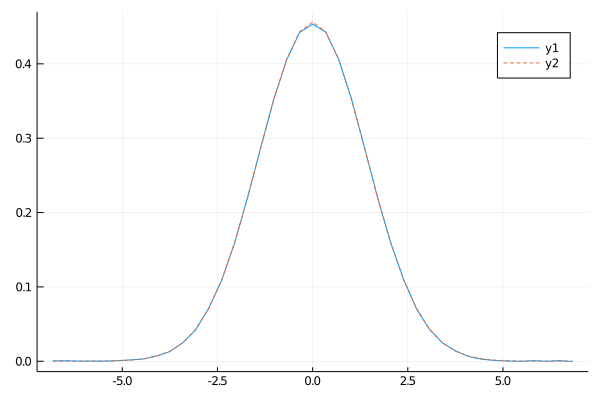

In [51]:
plot(vSpace.u, n_ode(f0, res.minimizer).u[end])
plot!(vSpace.u, ode_data[:,end], line=:dash)